# Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from scipy import stats
import time
# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# metrics
from sklearn.metrics import accuracy_score ,precision_score#, recall_score ,f1_score, confusion_matrix, classification_report

# Loading the file

In [4]:
file = r"C:\Users\AKIN-JOHNSON\Downloads\student_performance.csv"
df = pd.read_csv(file)
df.head()

,age,gender,level,exam_score,score_grade,study_hours,private_tutoring,pastquestions_practice,online_platforms,confidence_level,...,teaching_quality,mock_exams,study_materials,teachers_help,internet_access,commuting,financial_support,health_challenges,parents_education,remarks
0,15,Female,SS2,68,Average,4,Occasionally,Occasionally,Yes,4,...,3,Occasionally,No,Frequently,No,Walking,1,Yes,No formal education,Pass
1,18,Female,SS1,82,Excellent,4,Never,Always,No,2,...,3,Always,Yes,Always,No,Walking,4,Yes,Primary education,Fail
2,17,Male,SS1,94,Excellent,2,Occasionally,Never,Yes,5,...,2,Always,No,Occasionally,Yes,Walking,2,No,Primary education,Pass
3,17,Male,SS2,66,Average,5,Never,Never,Yes,5,...,1,Never,Yes,Never,Yes,School Bus,5,Yes,Tertiary education,Pass
4,16,Female,SS3,99,Excellent,2,Always,Never,No,3,...,4,Occasionally,Yes,Never,No,Private Transportation,1,Yes,Primary education,Pass


# Data Wrangling

In [6]:
# checking the list of column
df.columns

Index(['age', 'gender', 'level', 'exam_score', 'score_grade', 'study_hours',
       'private_tutoring', 'pastquestions_practice', 'online_platforms',
       'confidence_level', 'computer_lab_access', 'teaching_quality',
       'mock_exams', 'study_materials', 'teachers_help', 'internet_access',
       'commuting', 'financial_support', 'health_challenges',
       'parents_education', 'remarks'],
      dtype='object')

In [7]:
# lookng at the number of rows and columns in the dataset
df.shape

(503, 21)

In [8]:
# checking for duplicate entry
df.duplicated().sum()

0

In [9]:
# checking for missing values
df.isnull().sum().sum()

0

In [10]:
# checking for the data type
df.dtypes

age                        int64
gender                    object
level                     object
exam_score                 int64
score_grade               object
study_hours                int64
private_tutoring          object
pastquestions_practice    object
online_platforms          object
confidence_level           int64
computer_lab_access       object
teaching_quality           int64
mock_exams                object
study_materials           object
teachers_help             object
internet_access           object
commuting                 object
financial_support          int64
health_challenges         object
parents_education         object
remarks                   object
dtype: object

In [11]:
# handling outliers
numerical_columns = ['age', 'exam_score', 'study_hours', 'confidence_level', 'teaching_quality', 'financial_support']

# Z-score detection and handling
for column in numerical_columns:
    z_scores = np.abs(stats.zscore(df[column]))
    threshold = 3  # Set your threshold for Z-scores (3 is common)
    
    # Identify outliers
    outliers = df[z_scores > threshold]
    print(f"Outliers in {column}: {len(outliers)} rows")
    
    # Optionally remove them
    #df_cleaned = df[(z_scores <= threshold)]


Outliers in age: 2 rows
Outliers in exam_score: 0 rows
Outliers in study_hours: 0 rows
Outliers in confidence_level: 0 rows
Outliers in teaching_quality: 0 rows
Outliers in financial_support: 0 rows


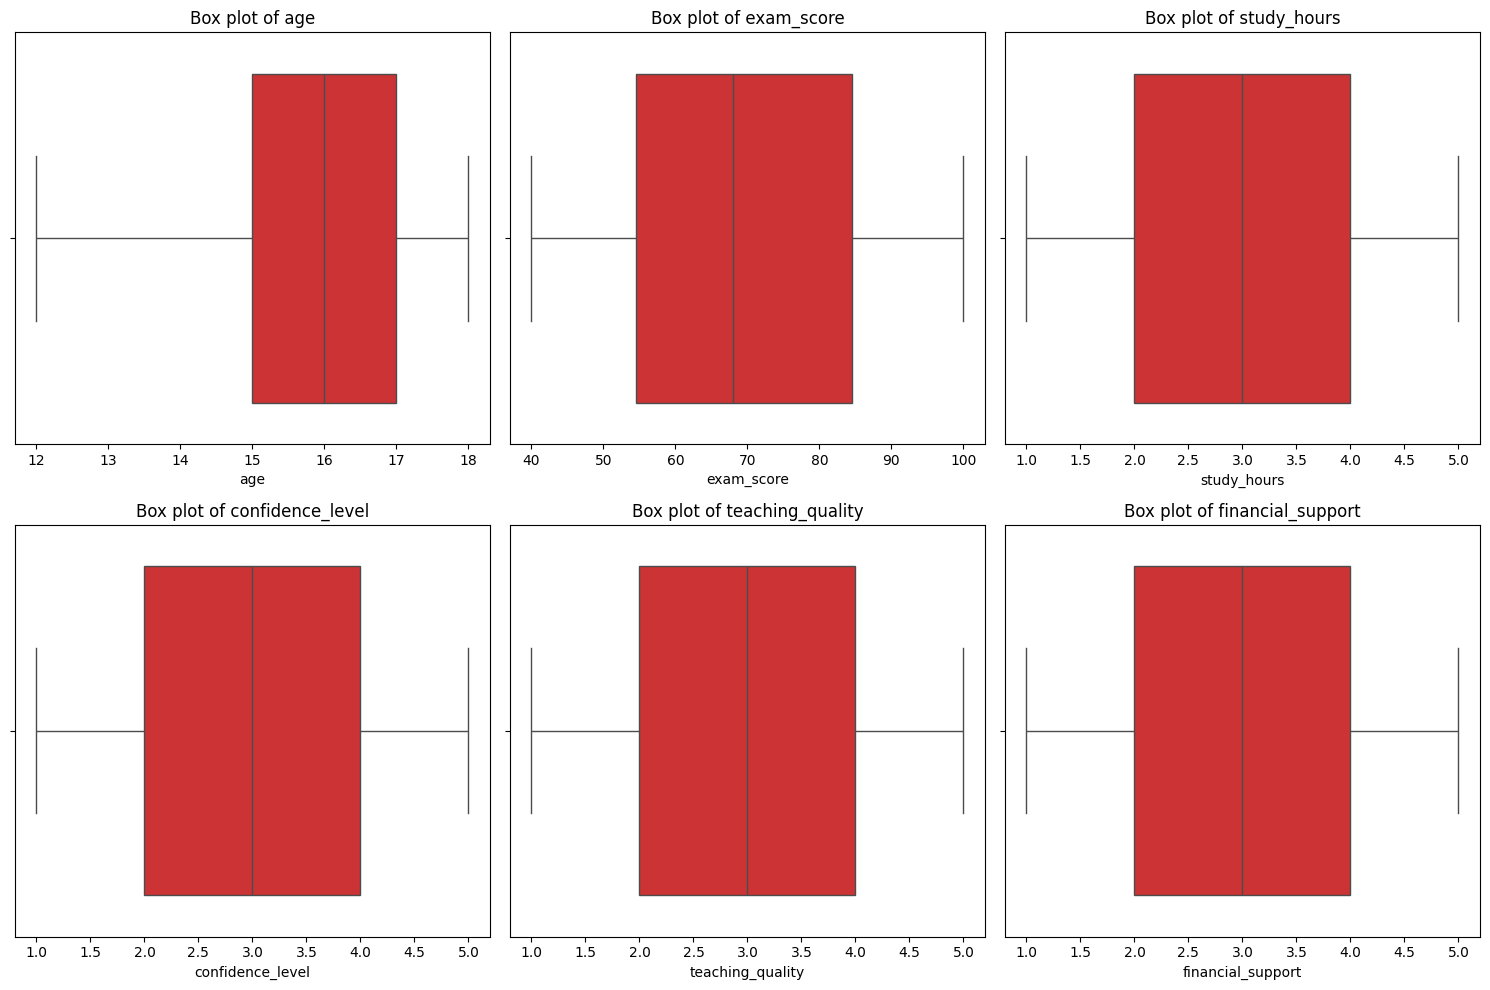

In [12]:
# plot a box plot to confirm the outliers
# Create a figure and axis for 6 subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create boxplots for each numerical column
for i, column in enumerate(numerical_columns[:6]):  # Limit to first 6 columns
    sns.boxplot(x=df[column], ax=axes[i], palette='Set1', fill=True)
    axes[i].set_title(f"Box plot of {column}")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the entire plot
plt.show()


# Exploratory Data Analysis (EDA) 

In [14]:
# Descriptive Analysis
# Initialize an empty dictionary to store the results
stats_results = {}

# Loop through each numerical column to calculate the statistics
for column in numerical_columns:
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  # mode() returns a Series, take the first mode
    std_dev = df[column].std()

    # Store the results in the dictionary
    stats_results[column] = {
        'Mean': mean,
        'Median': median,
        'Mode': mode,
        'Standard Deviation': std_dev
    }

# Convert the results to a DataFrame for better readability
stats_df = pd.DataFrame(stats_results).T

# Display the statistics
stats_df

,Mean,Median,Mode,Standard Deviation
age,16.467197,16.0,15.0,1.144194
exam_score,69.115308,68.0,92.0,17.645091
study_hours,3.071571,3.0,4.0,1.395370
confidence_level,3.141153,3.0,4.0,1.387895
teaching_quality,2.922465,3.0,1.0,1.411377
financial_support,2.936382,3.0,2.0,1.379968


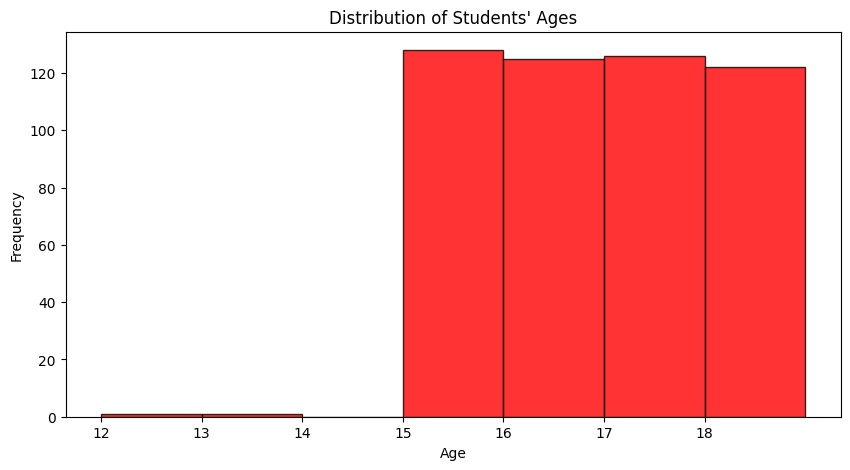

In [15]:
# What is the distribution of students' ages?
plt.figure(figsize=(10, 5))
plt.hist(df['age'], bins=range(int(df['age'].min()), int(df['age'].max()) + 2), color='r', alpha=0.8 ,edgecolor='black')
plt.title("Distribution of Students' Ages")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(int(df['age'].min()), int(df['age'].max()) + 1))  # Set x-ticks to whole numbers
plt.show()


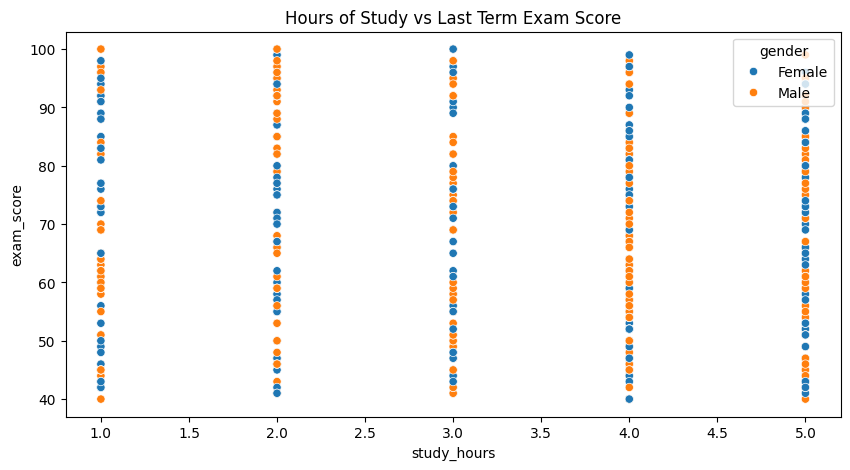

             study_hours  exam_score
study_hours     1.000000   -0.041436
exam_score     -0.041436    1.000000


In [16]:
# Is there a relationship between study habits (Hours of Study and Practice Past Questions) and exam scores?
# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='study_hours', y='exam_score', data=df, hue='gender')
plt.title('Hours of Study vs Last Term Exam Score')
plt.show()

# Correlation
correlation = df[['study_hours', 'exam_score']].corr()
print(correlation)

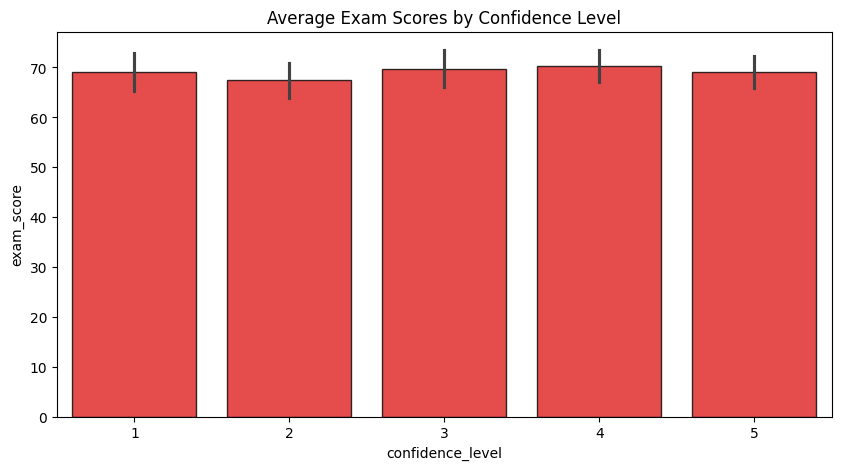

In [17]:
# What is the impact of confidence in passing WASSCE on exam scores?
# Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='confidence_level', y='exam_score', color='r', alpha=0.8, data=df, edgecolor='k')
plt.title('Average Exam Scores by Confidence Level')
plt.show()


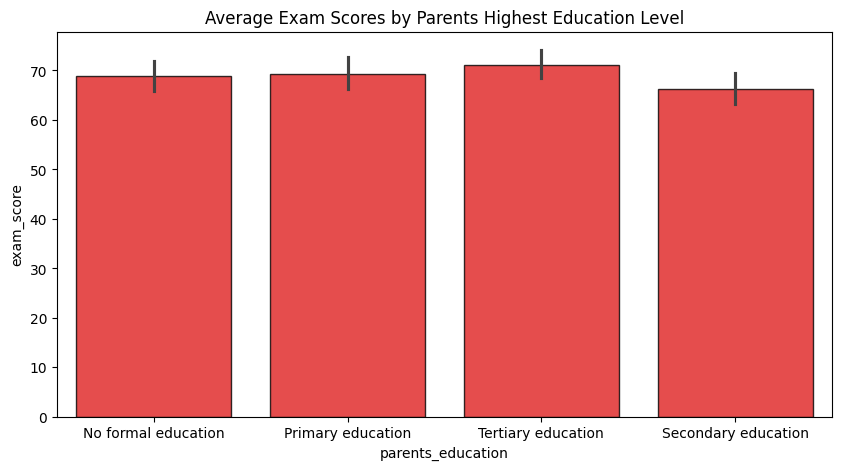

In [18]:
# What is the relationship between parental education and student performance?
# Bar plot for Parents' Education
plt.figure(figsize=(10, 5))
sns.barplot(x='parents_education', y='exam_score', data=df,color='r', alpha=0.8, edgecolor='k')
plt.title('Average Exam Scores by Parents Highest Education Level')
#plt.xticks(rotation=45)
plt.show()

# Machine Learning

In [20]:
# display the table for machine learning process
df.head()

,age,gender,level,exam_score,score_grade,study_hours,private_tutoring,pastquestions_practice,online_platforms,confidence_level,...,teaching_quality,mock_exams,study_materials,teachers_help,internet_access,commuting,financial_support,health_challenges,parents_education,remarks
0,15,Female,SS2,68,Average,4,Occasionally,Occasionally,Yes,4,...,3,Occasionally,No,Frequently,No,Walking,1,Yes,No formal education,Pass
1,18,Female,SS1,82,Excellent,4,Never,Always,No,2,...,3,Always,Yes,Always,No,Walking,4,Yes,Primary education,Fail
2,17,Male,SS1,94,Excellent,2,Occasionally,Never,Yes,5,...,2,Always,No,Occasionally,Yes,Walking,2,No,Primary education,Pass
3,17,Male,SS2,66,Average,5,Never,Never,Yes,5,...,1,Never,Yes,Never,Yes,School Bus,5,Yes,Tertiary education,Pass
4,16,Female,SS3,99,Excellent,2,Always,Never,No,3,...,4,Occasionally,Yes,Never,No,Private Transportation,1,Yes,Primary education,Pass


In [21]:
# deleting irrelevant columns from our dataset
df = df.drop(columns=['age','gender','level','commuting','financial_support','parents_education'], axis=1)
df.head()

,exam_score,score_grade,study_hours,private_tutoring,pastquestions_practice,online_platforms,confidence_level,computer_lab_access,teaching_quality,mock_exams,study_materials,teachers_help,internet_access,health_challenges,remarks
0,68,Average,4,Occasionally,Occasionally,Yes,4,No,3,Occasionally,No,Frequently,No,Yes,Pass
1,82,Excellent,4,Never,Always,No,2,Yes,3,Always,Yes,Always,No,Yes,Fail
2,94,Excellent,2,Occasionally,Never,Yes,5,No,2,Always,No,Occasionally,Yes,No,Pass
3,66,Average,5,Never,Never,Yes,5,Yes,1,Never,Yes,Never,Yes,Yes,Pass
4,99,Excellent,2,Always,Never,No,3,No,4,Occasionally,Yes,Never,No,Yes,Pass


In [23]:
# Initialize the LabelEncoder to convert string variable to numerical variables
label_encoder = LabelEncoder()

# Fit and transform the target column
df['private_tutoring'] = label_encoder.fit_transform(df['private_tutoring'])
df['score_grade'] = label_encoder.fit_transform(df['score_grade'])
df['pastquestions_practice'] = label_encoder.fit_transform(df['pastquestions_practice'])
df['online_platforms'] = label_encoder.fit_transform(df['online_platforms'])
df['computer_lab_access'] = label_encoder.fit_transform(df['computer_lab_access'])
df['mock_exams'] = label_encoder.fit_transform(df['mock_exams'])
df['study_materials'] = label_encoder.fit_transform(df['study_materials'])
df['teachers_help'] = label_encoder.fit_transform(df['teachers_help'])
df['internet_access'] = label_encoder.fit_transform(df['internet_access'])
df['health_challenges'] = label_encoder.fit_transform(df['health_challenges'])
df['remarks'] = label_encoder.fit_transform(df['remarks'])
df.head()

,exam_score,score_grade,study_hours,private_tutoring,pastquestions_practice,online_platforms,confidence_level,computer_lab_access,teaching_quality,mock_exams,study_materials,teachers_help,internet_access,health_challenges,remarks
0,68,0,4,3,4,1,4,0,3,3,0,1,0,1,1
1,82,1,4,2,1,0,2,1,3,0,1,0,0,1,0
2,94,1,2,3,3,1,5,0,2,0,0,3,1,0,1
3,66,0,5,2,3,1,5,1,1,2,1,2,1,1,1
4,99,1,2,0,3,0,3,0,4,3,1,2,0,1,1


In [24]:
# Split dataset into feature and target
X = df.drop(columns='remarks', axis=1)
y = df['remarks']

In [25]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [26]:
# Train the model using Train Test Split

# further split this data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=5, shuffle=True)
print(f'The Train size for the splits are: Features {X_train.shape} and Target {y_train.shape}')
print(f'The Test size for the splits are: Features {X_test.shape} and Target {y_test.shape}')

The Train size for the splits are: Features (352, 14) and Target (352,)
The Test size for the splits are: Features (151, 14) and Target (151,)


In [27]:
# listing models we want to train and putting them in a variable
lr = LogisticRegression(max_iter=10000)
svc = SVC(kernel='linear')
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

In [28]:
models = [lr, svc, dtc, rfc, knn]
for mod in models:
    # fit the models 
    print(f'Starting training for {mod} model .........')
    start_time = time.time()  # Track the time it takes for each model
    # fit the training dataset in to the model
    mod.fit(X_train, y_train)
    # predict the y_test
    y_test_pred = mod.predict(X_test)
    # print the model score for both Test and Train
    print(f'{mod} - Train Score: {mod.score(X_train, y_train):.4f}')
    print(f'{mod} - Test Score: {mod.score(X_test, y_test):.4f}')
    # Get our metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
     # Print the accuracy score
    print(f'The accuracy score for {mod} is: {accuracy:.4f}')
    print(f'The Precision Score for {mod} is {precision:.4f}')
    print(f'Time taken for {mod} to load is {start_time:.2f}')
    print('-----------------------------------------------------------------------------------')
    print()

Starting training for LogisticRegression(max_iter=10000) model .........
LogisticRegression(max_iter=10000) - Train Score: 0.8352
LogisticRegression(max_iter=10000) - Test Score: 0.7947
The accuracy score for LogisticRegression(max_iter=10000) is: 0.7947
The Precision Score for LogisticRegression(max_iter=10000) is 0.7538
Time taken for LogisticRegression(max_iter=10000) to load is 1728336117.52
-----------------------------------------------------------------------------------

Starting training for SVC(kernel='linear') model .........
SVC(kernel='linear') - Train Score: 0.8494
SVC(kernel='linear') - Test Score: 0.7947
The accuracy score for SVC(kernel='linear') is: 0.7947
The Precision Score for SVC(kernel='linear') is 0.7463
Time taken for SVC(kernel='linear') to load is 1728336117.54
-----------------------------------------------------------------------------------

Starting training for DecisionTreeClassifier(random_state=42) model .........
DecisionTreeClassifier(random_state=42

In [29]:
# Train the model using Cross Validation

for mod in models:
    print(f'Starting training for model: {mod}')
    start_time = time.time()  # Track the time it takes for each model
    score = cross_val_score(mod, X_scaled, y, scoring='accuracy', cv=5)
    print(f'The accuracy score for {mod} is {np.mean(score):.4f}')
    print(f'Time taken for {mod} to load is {start_time:.2f}')
    print('---------------------------------------------------------------------------------------')
    print()

Starting training for model: LogisticRegression(max_iter=10000)
The accuracy score for LogisticRegression(max_iter=10000) is 0.8170
Time taken for LogisticRegression(max_iter=10000) to load is 1728336118.01
---------------------------------------------------------------------------------------

Starting training for model: SVC(kernel='linear')
The accuracy score for SVC(kernel='linear') is 0.8011
Time taken for SVC(kernel='linear') to load is 1728336118.10
---------------------------------------------------------------------------------------

Starting training for model: DecisionTreeClassifier(random_state=42)
The accuracy score for DecisionTreeClassifier(random_state=42) is 1.0000
Time taken for DecisionTreeClassifier(random_state=42) to load is 1728336118.21
---------------------------------------------------------------------------------------

Starting training for model: RandomForestClassifier(random_state=42)
The accuracy score for RandomForestClassifier(random_state=42) is 1.00

In [30]:
# performing hyper parameter tuning to get the best parameters for the models

# Parameter grids for hyperparameter tuning
param_grids = {
    'LogisticRegression': {
        'C': [0.1, 1.0, 10.0],   # Regularization strength
        'solver': ['liblinear', 'lbfgs']
    },
    'SVC': {
        'C': [0.1, 1, 10],       # Regularization strength
        'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient
    },
    'DecisionTreeClassifier': {
        'max_depth': [5, 10, 20, None],  # Depth of the tree
        'min_samples_split': [2, 10, 20],  # Minimum samples to split a node
        'min_samples_leaf': [1, 5, 10]  # Minimum samples per leaf node
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],  # Number of trees in the forest
        'max_depth': [10, 20, None],  # Maximum depth of the trees
        'min_samples_split': [2, 10, 20]  # Minimum samples to split a node
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7],  # Number of neighbors to use
        'weights': ['uniform', 'distance'],  # Weight function used in prediction
        'metric': ['euclidean', 'manhattan']  # Distance metric to use
    }
}

# List of models
models = {
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'SVC': SVC(kernel='linear'),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier()
}

# Loop through each model, perform GridSearchCV
best_params = {}
for model_name, model in models.items():
    print(f"Starting Grid Search for {model_name} ...")
    
    # Create the grid search object
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    
    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    
    # Output the best parameters and score
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_}")
    best_params[model_name] = grid_search.best_params_

    print("-------------------------------------------------------------")


Starting Grid Search for LogisticRegression ...
Best parameters for LogisticRegression: {'C': 0.1, 'solver': 'liblinear'}
Best cross-validation accuracy: 0.8182696177062374
-------------------------------------------------------------
Starting Grid Search for SVC ...
Best parameters for SVC: {'C': 0.1, 'gamma': 0.001}
Best cross-validation accuracy: 0.8183501006036218
-------------------------------------------------------------
Starting Grid Search for DecisionTreeClassifier ...
Best parameters for DecisionTreeClassifier: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9971428571428571
-------------------------------------------------------------
Starting Grid Search for RandomForestClassifier ...
Best parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.9971428571428571
-------------------------------------------------------------
Starting Grid Search f

In [31]:
# Retrain the model based on the new parameters
lr = LogisticRegression(max_iter=10000, C=0.1, solver='lbfgs')
svc = SVC(kernel='linear', C=0.1, gamma=0.001)
dtc = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=1, min_samples_split=2)
rfc = RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=20, n_estimators=200)
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [32]:
# for train test split
models = [lr, svc, dtc, rfc, knn]
for mod in models:
    # fit the models 
    print(f'Starting training for {mod} model .........')
    start_time = time.time()  # Track the time it takes for each model
    # fit the training dataset in to the model
    mod.fit(X_train, y_train)
    # predict the y_test
    y_test_pred = mod.predict(X_test)
    # print the model score for both Test and Train
    print(f'{mod} - Train Score: {mod.score(X_train, y_train):.4f}')
    print(f'{mod} - Test Score: {mod.score(X_test, y_test):.4f}')
    # Get our metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
     # Print the accuracy score
    print(f'The accuracy score for {mod} is: {accuracy:.4f}')
    print(f'The Precision Score for {mod} is {precision:.4f}')
    print(f'Time taken for {mod} to load is {start_time:.2f}')
    print('-----------------------------------------------------------------------------------')
    print()

Starting training for LogisticRegression(C=0.1, max_iter=10000) model .........
LogisticRegression(C=0.1, max_iter=10000) - Train Score: 0.8466
LogisticRegression(C=0.1, max_iter=10000) - Test Score: 0.7947
The accuracy score for LogisticRegression(C=0.1, max_iter=10000) is: 0.7947
The Precision Score for LogisticRegression(C=0.1, max_iter=10000) is 0.7538
Time taken for LogisticRegression(C=0.1, max_iter=10000) to load is 1728336148.26
-----------------------------------------------------------------------------------

Starting training for SVC(C=0.1, gamma=0.001, kernel='linear') model .........
SVC(C=0.1, gamma=0.001, kernel='linear') - Train Score: 0.8409
SVC(C=0.1, gamma=0.001, kernel='linear') - Test Score: 0.8013
The accuracy score for SVC(C=0.1, gamma=0.001, kernel='linear') is: 0.8013
The Precision Score for SVC(C=0.1, gamma=0.001, kernel='linear') is 0.7576
Time taken for SVC(C=0.1, gamma=0.001, kernel='linear') to load is 1728336148.27
---------------------------------------

In [33]:
# for cross validation
for mod in models:
    print(f'Starting training for model: {mod}')
    start_time = time.time()  # Track the time it takes for each model
    score = cross_val_score(mod, X_scaled, y, scoring='accuracy', cv=5)
    print(f'The accuracy score for {mod} is {np.mean(score):.4f}')
    print(f'Time taken for {mod} to load is {start_time:.2f}')
    print('---------------------------------------------------------------------------------------')
    print()

Starting training for model: LogisticRegression(C=0.1, max_iter=10000)
The accuracy score for LogisticRegression(C=0.1, max_iter=10000) is 0.8170
Time taken for LogisticRegression(C=0.1, max_iter=10000) to load is 1728336148.90
---------------------------------------------------------------------------------------

Starting training for model: SVC(C=0.1, gamma=0.001, kernel='linear')
The accuracy score for SVC(C=0.1, gamma=0.001, kernel='linear') is 0.7952
Time taken for SVC(C=0.1, gamma=0.001, kernel='linear') to load is 1728336148.94
---------------------------------------------------------------------------------------

Starting training for model: DecisionTreeClassifier(max_depth=5, random_state=42)
The accuracy score for DecisionTreeClassifier(max_depth=5, random_state=42) is 1.0000
Time taken for DecisionTreeClassifier(max_depth=5, random_state=42) to load is 1728336148.99
---------------------------------------------------------------------------------------

Starting training f

# Save the model

In [35]:
joblib.dump(model, 'model.joblib')

['model.joblib']